Импорт библиотек

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta

In [301]:
data = pd.read_csv('main_task.csv')
data

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Рассмотрю все колонки

### Restaurant_id

In [303]:
data['Restaurant_id'].describe()

count      40000
unique     11909
top       id_633
freq          18
Name: Restaurant_id, dtype: object

Как видно, уникальных значений 11909, значит есть рестораны, которые встречаются в датасете несколько раз.

In [304]:
del data['Restaurant_id'] #удалю данный столбец, так как он не понадобится для дальнейшей работы

### City

In [305]:
data['City'].describe()

count      40000
unique        31
top       London
freq        5757
Name: City, dtype: object

Всего в датасете представлен 31 город. Для наглядности построю диаграмму.

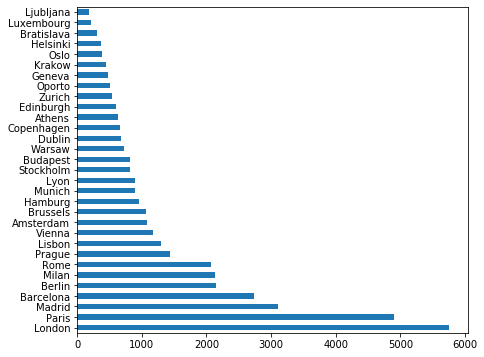

In [306]:
data['City'].value_counts().plot(kind='barh', figsize=(7, 6))

Из данного графика распределения видно, что больше всего ресторанов сосредоточено в Лондоне.

### Cuisine Style

In [307]:
data['Cuisine Style'].describe()

count           30717
unique           9007
top       ['Italian']
freq             1032
Name: Cuisine Style, dtype: object

В данном столбце виды кухонь представлены в виде списка их необходимо преобразовать.

In [308]:
import ast

Посчитаю сколько типов кухонь представлено в наборе данных

In [309]:
data.loc[data['Cuisine Style'].notna(), 'Cuisine Style'] = data.loc[data['Cuisine Style'].notna(),
                                                                    'Cuisine Style'].apply(lambda x: ast.literal_eval(x))

In [310]:
data.explode('Cuisine Style')['Cuisine Style'].value_counts()

Vegetarian Friendly    11189
European               10060
Mediterranean           6277
Italian                 5964
Vegan Options           4486
                       ...  
Xinjiang                   1
Yunnan                     1
Latvian                    1
Burmese                    1
Salvadoran                 1
Name: Cuisine Style, Length: 125, dtype: int64

In [311]:
data.explode('Cuisine Style')['Cuisine Style'].nunique()

125

Посчитаю какое среднее количество кухонь предлагается в одном ресторане

In [312]:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace('[',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace(']',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace(' ',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x:x.split(','))
round(data['Cuisine Style'].apply(lambda x: len(x)).mean(),1)

2.6

In [313]:
data['Cuisine Style'].fillna('no data',inplace=True)

Добавлю новый признак 'quantity_kitchen' (количество типов кухонь на основе столбца 'Cuisine Style'

In [314]:
def len_kitchen(i):
    if i !='no data':
        return len(i)
    else:
        return 1

In [315]:
data['Quantity_of_kitchens'] = data['Cuisine Style'].apply(len_kitchen)

In [316]:
del data['Cuisine Style']

### Ranking

Рассмотрю данный столбец на диаграмме

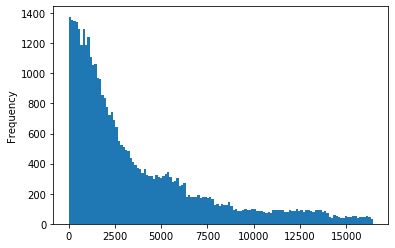

In [317]:
data['Ranking'].plot(kind='hist', bins=130)

### Rating

Для наглядности также рассмотрю данный столбец на диаграмме

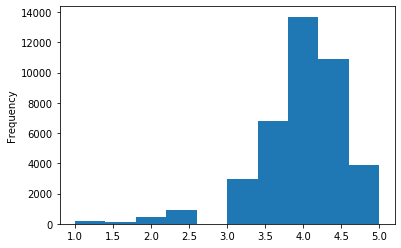

In [318]:
data['Rating'].plot(kind='hist')
plt.show()

Здесь нет никаких выбросов

In [319]:
data['Rating'].value_counts()

4.0    13692
4.5    10929
3.5     6824
5.0     3879
3.0     2955
2.5      915
2.0      466
1.0      201
1.5      139
Name: Rating, dtype: int64

In [320]:
def activ(i):
    if 0 < i <= 2:
        return 'bad'
    elif 2 < i <= 3.5:
        return 'neutral'
    elif 3.5 < i <= 5:
        return 'good'

In [321]:
data['popularity'] = data['Rating'].apply(activ)

### Price Range

In [322]:
data['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

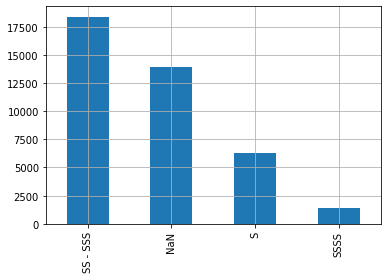

In [323]:
price = data['Price Range'].value_counts(dropna=False)
price.index = ['SS - SSS', 'NaN', 'S', 'SSSS']
price.plot(kind='bar', grid=True)
plt.show()

Как видно из графика, в данном столбце много пропусков

In [324]:
data['Price Range'].replace({'$': 'low','$$ - $$$': 'medium','$$$$': 'high'},inplace=True)

In [325]:
data['Price Range'].fillna('no_data',inplace=True)

### Number of Reviews

In [326]:
data['Number of Reviews'].describe()

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

In [327]:
data['Number of Reviews'].value_counts()

2.0       1916
3.0       1636
4.0       1370
5.0       1181
6.0       1018
          ... 
2141.0       1
920.0        1
1404.0       1
979.0        1
1698.0       1
Name: Number of Reviews, Length: 1459, dtype: int64

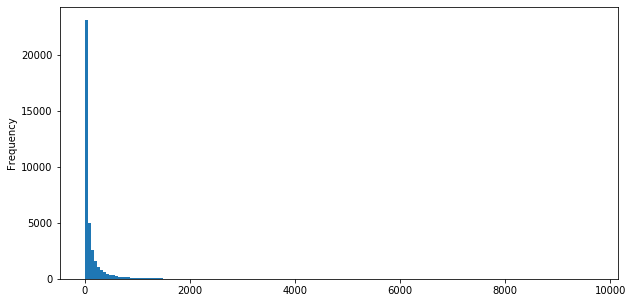

In [328]:
data['Number of Reviews'].plot(kind='hist', figsize=(10, 5), bins=170)
plt.show()

Разделю данные на группы с интервалом Ranking в 1000 и заполню медианой для заполнения пропусков 

In [329]:
for start in range(0, 17000, 1000):
    stop = start+1000
    median = data[(data['Ranking'] >= start) & (
        data['Ranking'] < stop)]['Number of Reviews'].describe()['50%']
    data.loc[(data['Ranking'] >= start) & (data['Ranking'] < stop), 'Number of Reviews'] = data.loc[(
        data['Ranking'] >= start) & (data['Ranking'] < stop), 'Number of Reviews'].fillna(median)

### Reviews

Найду когда был оставлен самый свежий отзыв

In [331]:
pattern = re.compile('\'\d+\/\d+\/\d+\'?')
data['Reviews Date'] = data['Reviews'].apply(lambda x: pattern.findall(x))
data['Reviews Date'].apply(lambda x: [datetime.strptime(item, "'%m/%d/%Y'") for item in x]).max()

[datetime.datetime(2018, 2, 26, 0, 0), datetime.datetime(2018, 2, 26, 0, 0)]

In [332]:
del data['Reviews Date']

### URL_TA

In [333]:
data['URL_TA'].describe()

count                                                 40000
unique                                                39980
top       /Restaurant_Review-g187514-d697406-Reviews-Al_...
freq                                                      2
Name: URL_TA, dtype: object

In [334]:
data['URL_TA'].duplicated().sum()

20

В данном столбце встречаются дубликаты

### ID_TA

In [335]:
data['ID_TA'].describe()

count        40000
unique       39980
top       d7342803
freq             2
Name: ID_TA, dtype: object

In [336]:
data['ID_TA'].duplicated().sum()

20

Здесь также как и в столбце 'URL_TA' есть дубликаты

In [337]:
data.isna().sum() #пропуски заполнены

City                    0
Ranking                 0
Rating                  0
Price Range             0
Number of Reviews       0
Reviews                 0
URL_TA                  0
ID_TA                   0
Quantity_of_kitchens    0
popularity              0
dtype: int64

In [338]:
del data['URL_TA']
del data['ID_TA']

In [339]:
del data['Reviews']

In [348]:
data_model = pd.get_dummies(data, columns=['Price Range','City','popularity'], prefix='', prefix_sep='')

### Создам полиномиальные признаки

In [358]:
data_model['Number of Reviews_2'] = data_model['Number of Reviews']**2
data_model['Ranking_2'] = data_model['Ranking']**2

## Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [359]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = data_model.drop(['Rating'], axis = 1)
y = data_model['Rating']

In [360]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [361]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Создаём, обучаем и тестируем модель

In [362]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [363]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [364]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.155754
